In [1]:
# basic usage of Flux and learning https://arxiv.org/pdf/1801.05894.pdf
using Gnuplot
using Flux

In [2]:
# get the x - data points
x1 = [0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7]; # from the paper
x2 = [0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6];
xs = [[x1[i], x2[i]] for i = 1:10]              # convert to be used with Flux

10-element Vector{Vector{Float64}}:
 [0.1, 0.1]
 [0.3, 0.4]
 [0.1, 0.5]
 [0.6, 0.9]
 [0.4, 0.2]
 [0.6, 0.3]
 [0.5, 0.6]
 [0.9, 0.2]
 [0.4, 0.4]
 [0.7, 0.6]

In [3]:
# get the y data points 
y = [ones(1,5) zeros(1,5); zeros(1,5) ones(1,5)] # from the paper
ys = [y[:, i] for i = 1:10] # convert to be used with Flux

10-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]

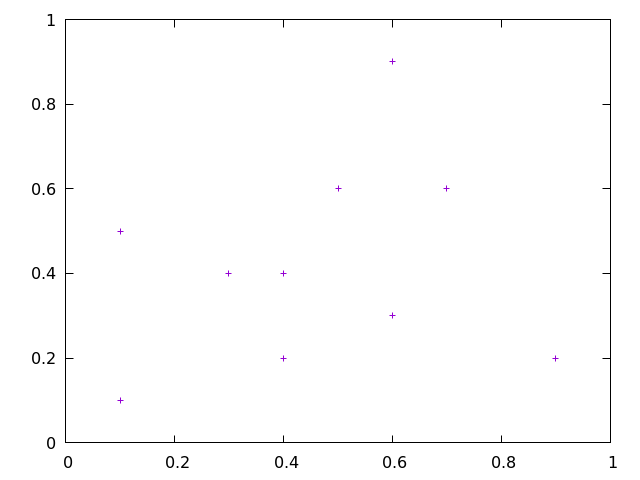

In [4]:
datapts = zip(xs, ys) # collect the xs and ys for training purposes. 

#gpexec("set term qt size 10,10 font 'Arial,10'")
#Gnuplot.options.term = "qt  size 200,200" # won't work since options.gpviewer = false (since not using interactive terminal)
@gp x1 x2
#Gnuplot.options.term
#Gnuplot.options.gpviewer
#Gnuplot.options.mime

#Jupyter would store images in all such formats in the notebook.  To shrink the notebook size
#you may choose the format providing best results, and disable the others:
#
#Gnuplot.options.mime[MIME"image/png"] = "";
#Gnuplot.options.mime[MIME"image/svg+xml"] = "";
#Gnuplot.options.mime[MIME"text/html"] = "svg enhanced standalone mouse size 800,400";
Gnuplot.options.mime[MIME"text/html"] = "svg enhanced standalone mouse size 400,400";
@gp "reset" 
@gp :- "set xrange [0:1]"
@gp :- "set yrange [0:1]"
 #@gp :- :inc "set xrange [1:365]"
@gp :- x1 x2 "notitle"
#Gnuplot.options.mime

In [6]:
# Flux Model 
m = Chain(Dense(2, 3, σ), Dense(3, 2, σ), Dense(2, 2, σ))

## now, given the original data points, see how well it classifies them using random W and b 
modresults = m.(xs) 
# convert mod results to classification
class = map(r -> r[1] >= r[2] ? [1.0, 0.0] : [0.0, 1.0], modresults)


10-element Vector{Vector{Float64}}:
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]

In [7]:
# we need to train the model. The ys vector denotes whether the xs data point belongs to 
loss(x, y) = Flux.Losses.mse(m(x), y)
ps = params(m)
for i = 1:100000
    Flux.train!(loss, ps, datapts, Descent(0.01))
end
println(params(m))

Params([Float32[6.808468 9.219505; 0.33829582 0.6459044; -5.7654686 7.6347723], Float32[-5.5085998, 0.29274333, -2.0925853], Float32[-5.719081 0.39658144 5.5416455; 8.433415 -1.5586903 -8.192214], Float32[1.9181063, -2.1588645], Float32[6.1191363 -9.049415; -6.3620296 8.879536], Float32[1.5894086, -1.3823694]])


In [9]:
modresults = m.(xs)  ## now, given the original data points, see how well it classifies them 
class = map(r -> r[1] >= r[2] ? [1.0, 0.0] : [0.0, 1.0], modresults)
class

10-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [1.0, 0.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]
 [0.0, 1.0]

In [18]:
x1q = LinRange(0, 1, 100)
x2q = LinRange(0, 1, 100)
xg = collect.(Iterators.product(x1q, x2q))
xgr = m.(xg)

100×100 Matrix{Vector{Float64}}:
 [0.999222, 0.000759647]  [0.999241, 0.000740736]  …  [0.998786, 0.00119339]
 [0.999206, 0.000775003]  [0.999225, 0.000755982]     [0.998774, 0.00120609]
 [0.99919, 0.000790565]   [0.99921, 0.00077149]       [0.998761, 0.00121839]
 [0.999175, 0.000806314]  [0.999194, 0.000787244]     [0.998749, 0.00123032]
 [0.999159, 0.000822231]  [0.999178, 0.000803224]     [0.998738, 0.0012419]
 [0.999142, 0.000838299]  [0.999161, 0.000819416]  …  [0.998726, 0.00125315]
 [0.999126, 0.000854503]  [0.999145, 0.000835806]     [0.998715, 0.00126411]
 [0.99911, 0.000870833]   [0.999128, 0.000852382]     [0.998705, 0.0012748]
 [0.999093, 0.000887278]  [0.999111, 0.000869137]     [0.998694, 0.00128524]
 [0.999076, 0.000903834]  [0.999094, 0.000886065]     [0.998684, 0.00129548]
 [0.999059, 0.000920499]  [0.999077, 0.000903166]  …  [0.998674, 0.00130553]
 [0.999043, 0.000937275]  [0.999059, 0.000920444]     [0.998664, 0.00131544]
 [0.999025, 0.000954169]  [0.999042, 0.000937

In [20]:
xgq = map(x -> x[1] > x[2] ? 1 : 0, xgr)


100×100 Matrix{Int64}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1   

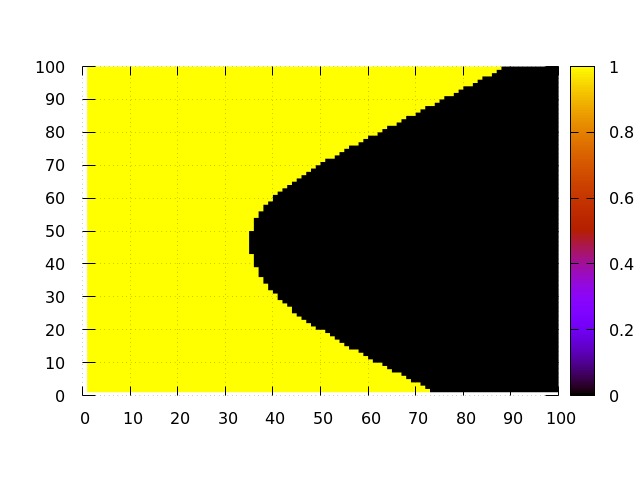

In [50]:
@gp "reset"
@gp :- "set view map"  # bird eye view of 3d plot
#@gp :- "set dgrid3d 100,100,2"
@gp :- "set grid x y lc 'black' front"
@gp :- "unset border"
#@gp :- "set pm3d corners2color c3"
@gp :- "set pm3d interpolate 10,10"
 @gsp :-  1:100 1:100 xgq "with pm3d notitle ls 1" 

In [24]:
findall(x -> x > 0 && x < 1, xgq)


CartesianIndex{2}[]